## Preprocessing

In [14]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [15]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])

In [16]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [17]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()

In [18]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff = 500
application_types_to_replace = application_counts[application_counts < cutoff].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [19]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()

In [20]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts[classification_counts > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [21]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff = 1000
classifications_to_replace = classification_counts[classification_counts < cutoff].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [22]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies = pd.get_dummies(application_df)
application_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [23]:
# Split our preprocessed data into our features and target arrays
X = application_dummies.drop('IS_SUCCESSFUL', axis=1).values
y = application_dummies['IS_SUCCESSFUL'].values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [24]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5717 - accuracy: 0.7212
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5553 - accuracy: 0.7301
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5517 - accuracy: 0.7313
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5502 - accuracy: 0.7330
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5494 - accuracy: 0.7348
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5479 - accuracy: 0.7343
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5479 - accuracy: 0.7328
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5471 - accuracy: 0.7348
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5467 - accuracy: 0.7350
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5461 - accura

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5560 - accuracy: 0.7257 - 913ms/epoch - 3ms/step
Loss: 0.5560162663459778, Accuracy: 0.7257142663002014


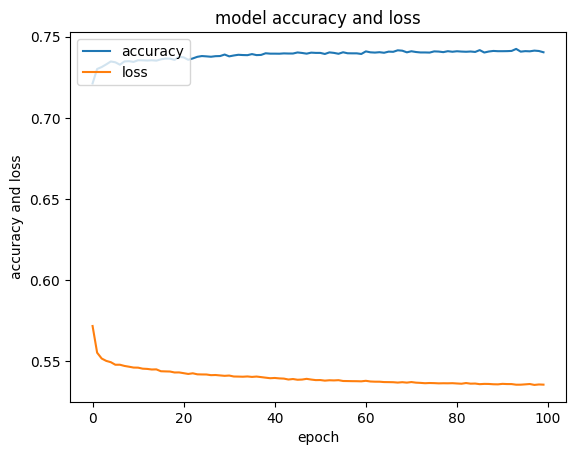

In [29]:
#plot the accuracy and loss
import matplotlib.pyplot as plt
plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

# The accuracy is at 72.5% and the loss is at 0.55. This is not a good model. We need to try to improve the model.



In [66]:
#fine tune the model
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  7
hidden_nodes_layer2 = 14
#hidden_nodes_layer3 = 1

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 7)                 308       
                                                                 
 dense_12 (Dense)            (None, 14)                112       
                                                                 
 dense_13 (Dense)            (None, 1)                 15        
                                                                 
Total params: 435
Trainable params: 435
Non-trainable params: 0
_________________________________________________________________


In [67]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [68]:
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 4s 2ms/step - loss: 0.5987 - accuracy: 0.7076
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5635 - accuracy: 0.7289
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5590 - accuracy: 0.7294
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5563 - accuracy: 0.7308
Epoch 5/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5549 - accuracy: 0.7304
Epoch 6/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5540 - accuracy: 0.7308
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5531 - accuracy: 0.7317
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5525 - accuracy: 0.7317
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5521 - accuracy: 0.7324
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5509 - accura

In [69]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

#there is no improvement in the model. The accuracy is at 72.5% and the loss is at 0.55. This is not a good model. We need to try to improve the model.

268/268 - 1s - loss: 0.5531 - accuracy: 0.7275 - 611ms/epoch - 2ms/step
Loss: 0.5530908107757568, Accuracy: 0.7274635434150696


In [70]:
#fine tune the model
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  7
hidden_nodes_layer2 = 14
hidden_nodes_layer3 = 21

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 7)                 308       
                                                                 
 dense_15 (Dense)            (None, 14)                112       
                                                                 
 dense_16 (Dense)            (None, 21)                315       
                                                                 
 dense_17 (Dense)            (None, 1)                 22        
                                                                 
Total params: 757
Trainable params: 757
Non-trainable params: 0
_________________________________________________________________


In [71]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [72]:
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 4s 3ms/step - loss: 0.6045 - accuracy: 0.6870
Epoch 2/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5664 - accuracy: 0.7252
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5599 - accuracy: 0.7273
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5573 - accuracy: 0.7296
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5553 - accuracy: 0.7301
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5547 - accuracy: 0.7313
Epoch 7/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5543 - accuracy: 0.7303
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5538 - accuracy: 0.7320
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5533 - accuracy: 0.7306
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5523 - accura

In [73]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5527 - accuracy: 0.7216 - 1s/epoch - 5ms/step
Loss: 0.5527360439300537, Accuracy: 0.7216326594352722


In [52]:
#lets try to automate the process of finding the best number of hidden layers and nodes using keras tuner
# Create a method that creates a new Sequential model with hyperparameter options
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
from tensorflow.keras.optimizers import Adam
def create_model(hp):
    # Define the input layer
    input_layer = Input(shape=(X_train.shape[1],))
    
    # Define the number of neurons in the first layer
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    
    # Add the first Dense layer with ReLU activation
    hidden_layer = Dense(units=hp_units, activation='relu')(input_layer)
    
    # Add additional hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        hp_units = hp.Int(f'units_{i}', min_value=32, max_value=512, step=32)
        hidden_layer = Dense(units=hp_units, activation='relu')(hidden_layer)
    
    # Define the output layer
    output_layer = Dense(1, activation='sigmoid')(hidden_layer)
    
    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return nn 

In [53]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)

In [54]:
# optimize the model
tuner.search(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test))

Trial 180 Complete [00h 02m 44s]
val_accuracy: 0.7265306115150452

Best val_accuracy So Far: 0.7274635434150696
Total elapsed time: 02h 03m 47s
INFO:tensorflow:Oracle triggered exit


In [57]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

#Even when trying to automate using keras tuner, the accuracy is at 72.7% and the loss is at 0.55. 
#I am not sure how else to improve the model. I have tried to change the activation function, the optimizer, the number of epochs, the number of hidden layers and the number of nodes in each layer.


In [55]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")
